In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np

from sklearn.metrics import accuracy_score

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

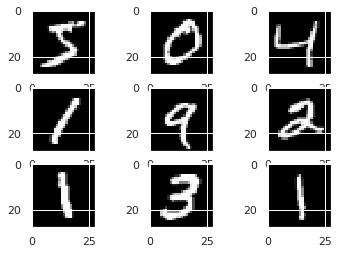

In [3]:
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))

In [4]:
def one_hot(a, n_classes):
    return np.squeeze(np.eye(n_classes)[a.reshape(-1)])

X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
#y_train = one_hot(y_train, 10)
#y_test = one_hot(y_test, 10)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255.0
X_test /= 255.0

In [5]:
l = tf.keras.layers
pool = l.MaxPooling2D((2, 2), (2, 2), padding='same')
model = tf.keras.Sequential([
    l.Conv2D(32, 5, padding='same', activation=tf.nn.relu),
    pool,
    l.Conv2D(64, 5, padding='same', activation=tf.nn.relu),
    pool,
    l.Flatten(),
    l.Dense(1024, activation=tf.nn.relu),
    l.Dropout(0.4),
    l.Dense(10, activation=tf.nn.softmax),
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
             loss=tf.keras.losses.SparseCategoricalCrossentropy(),
             metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

history = model.fit(X_train, y_train, batch_size=64, epochs=5, verbose=1)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 98s 2ms/sample - loss: 0.1115 - sparse_categorical_accuracy: 0.9654
Epoch 2/5
27008/60000 [============>.................] - ETA: 54s - loss: 0.0413 - sparse_categorical_accuracy: 0.9873

In [ ]:
preds_test = model.predict(X_test)
acc_test = accuracy_score(y_test, preds_test)
print(f'Test accuracy: {acc_test}')